In [1]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt

### Build Dataset

In [2]:
files = glob.glob("../tables/*.csv")

In [3]:
dfs = [pd.read_csv(df) for df in files]
for df in dfs:
  if ' 30.00' in df.columns:
    df.rename(columns={' 30.00': '30.00'}, inplace=True)
concated_df = pd.concat(dfs, ignore_index=True)

In [4]:
concated_df.columns, len(np.unique(concated_df.columns))

(Index(['30.00', ' 40.00', ' 50.00', ' h', ' 35.00', ' 45.00', ' 55.00',
        '25.00', '20.50', ' 25.50', ' 30.50', ' 35.50', ' 35.5'],
       dtype='object'),
 13)

In [5]:
concated_df

,30.00,40.00,50.00,h,35.00,45.00,55.00,25.00,20.50,25.50,30.50,35.50,35.5
0,22.75,31.85,38.30,17.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22.90,31.50,38.20,17.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22.75,31.30,38.45,17.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22.75,31.40,38.55,17.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22.65,31.40,38.45,17.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,NaN,NaN,NaN,15.05,NaN,NaN,NaN,NaN,13.8,19.20,23.7,NaN,27.05
81,NaN,NaN,NaN,15.05,NaN,NaN,NaN,NaN,13.9,19.40,23.8,NaN,27.60
82,NaN,NaN,NaN,15.05,NaN,NaN,NaN,NaN,13.7,19.55,23.3,NaN,27.70
83,NaN,NaN,NaN,15.05,NaN,NaN,NaN,NaN,13.6,19.10,23.5,NaN,27.50


In [6]:
tidy_df = concated_df.melt(id_vars=[' h'], var_name='H', value_name='R')

In [7]:
tidy_df.dropna(axis=0, how='any', inplace=True)
tidy_df = tidy_df.applymap(float).sort_values(by='H')

In [8]:
tidy_df

,h,H,R
666,15.05,20.5,13.70
654,15.10,20.5,14.15
655,15.10,20.5,14.25
656,15.10,20.5,14.15
657,15.10,20.5,14.15
...,...,...,...
460,17.70,55.0,40.05
461,17.70,55.0,40.25
462,17.70,55.0,40.30
448,17.80,55.0,39.85


In [9]:
tidy_df.columns

Index([' h', 'H', 'R'], dtype='object')

### Plot Data

<AxesSubplot:xlabel='H', ylabel='R'>

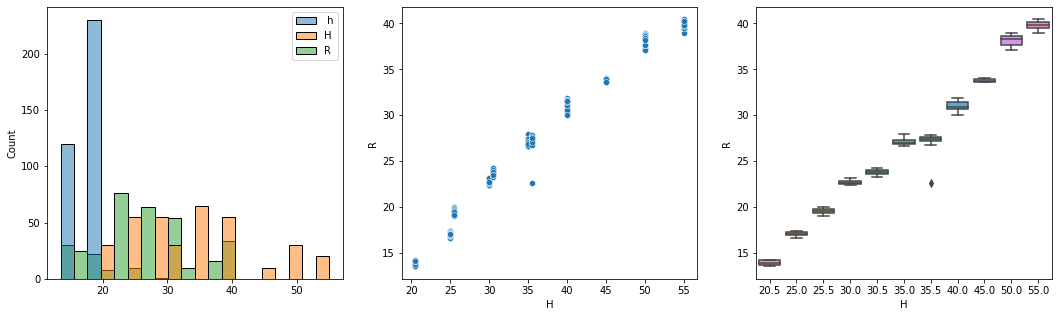

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
sns.histplot(data=tidy_df, bins=20, ax=axes[0])
sns.scatterplot(data=tidy_df, x='H', y='R', ax=axes[1])
sns.boxplot(data=tidy_df, x='H', y='R')

In [11]:
tidy_df.H.value_counts()

40.0    55
30.0    55
35.0    35
50.0    30
35.5    30
30.5    30
25.5    30
20.5    30
25.0    25
55.0    20
45.0    10
Name: H, dtype: int64

<AxesSubplot:title={'center':'40'}, xlabel='R', ylabel='Count'>

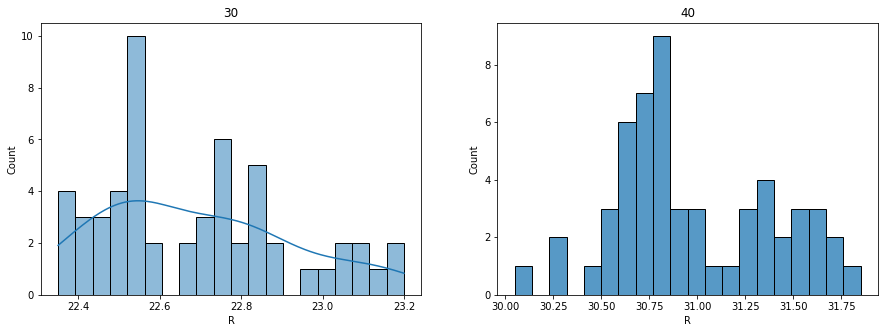

In [12]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].set_title("30")
axes[1].set_title("40")
sns.histplot(data=tidy_df[tidy_df['H']==30.0], x='R', bins=20, ax=axes[0], kde=True)
sns.histplot(data=tidy_df[tidy_df['H']==40.0], x='R', bins=20, ax=axes[1])

### Plotar com modelo teórico

In [13]:
def theoricalRange(H: float, h: float, rotation: bool=True) -> float:
  rotationValue = 5/7 if rotation else 1
  return 2 * np.sqrt(rotationValue*(h*(H - h)))

In [14]:
theoricalRanges = [theoricalRange(float(i), float(j)) for i, j in zip(tidy_df['H'], tidy_df[' h'])]

<AxesSubplot:>

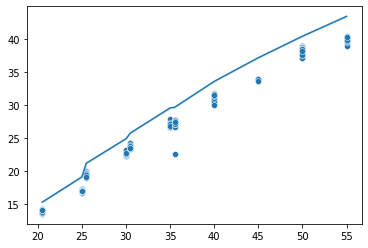

In [15]:
sns.lineplot(x=tidy_df['H'].values, y=theoricalRange(H=tidy_df['H'].values, h=tidy_df[' h'].values))
sns.scatterplot(x=tidy_df['H'].values, y=tidy_df['R'].values)

c:\Users\migue\anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\migue\anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:>

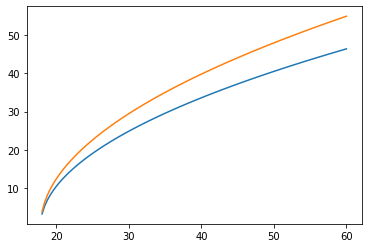

In [16]:
interval = np.linspace(15, 60, 120)
sns.lineplot(x=interval, y=theoricalRange(H=interval, h=17.80))
sns.lineplot(x=interval, y=theoricalRange(H=interval, h=17.80, rotation=False))

### Pre Treined

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [18]:
pre_trained = tidy_df.sample(frac=1.0)
pre_trained

,h,H,R
172,17.80,50.0,38.45
823,15.10,30.5,23.95
746,15.10,25.5,19.55
203,17.70,50.0,37.20
107,17.80,40.0,30.70
...,...,...,...
562,17.90,25.0,17.00
21,17.80,30.0,22.40
30,17.70,30.0,22.70
449,17.80,55.0,39.40


### Normalize and spliting the values

In [19]:
X = pre_trained.iloc[:, :-1].values
y = pre_trained.iloc[:, -1].values.reshape(-1, 1) # Reshape to return in Matrix like
assert X.shape[0] == y.shape[0]

In [20]:
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

In [21]:
X = x_scaler.fit_transform(X)
y = y_scaler.fit_transform(y)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)
y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)

In [23]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((262, 2), (262, 1), (88, 2), (88, 1))

### Apply Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
lrModel = LinearRegression()

In [25]:
reg = lrModel.fit(x_train, y_train)

In [26]:
reg.coef_, reg.intercept_ # Coeficientes a e b da função linear

(array([[-0.00827587,  1.0045181 ]]), array([0.06184834]))

### Predictions and Comparation with real values

In [27]:
y_pred = reg.predict(x_test)
assert y_pred.shape == y_test.shape
y_pred.shape, y_test.shape

((88, 1), (88, 1))

In [28]:
mean_squared_error(y_pred, y_test) # Erro quadrado médio com conjunto test

0.0010660851232319052

In [29]:
X = np.vstack([x_train, x_test])
y = np.vstack([y_train, y_test])

assert X.shape[0] == y.shape[0]
X.shape, y.shape

((350, 2), (350, 1))

In [30]:
y_pred = reg.predict(X)
assert y_pred.shape == y.shape

In [31]:
mean_squared_error(y_pred, y) # Erro quadrado médio com conjunto total

0.0013090525068256051

In [32]:
y, y_pred = y_scaler.inverse_transform(y), y_scaler.inverse_transform(y_pred)
X = x_scaler.inverse_transform(X)

<AxesSubplot:>

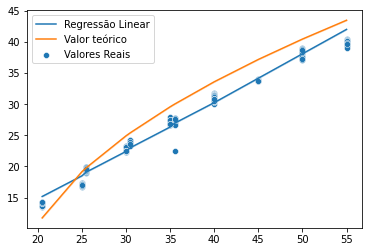

In [33]:
sns.lineplot(x=X[:, 1].reshape(-1,), y=y_pred.reshape(-1,), label="Regressão Linear")
sns.scatterplot(x=X[:, 1].reshape(-1,), y=y.reshape(-1,), label="Valores Reais")
sns.lineplot(x=X[:, 1].reshape(-1,), y=theoricalRange(H=X[:, 1], h=17.8), label="Valor teórico")

## Todo:
- Usar estratégia de oversampling
- Usar Normalization invez de MinMaxScaler
- Buscar outro algoritmo de Regressão
- Pesquisar como usar algoritmos de Classificação
- Incluir massa e diametro da esfera como variáveis no dataset

In [34]:
%store tidy_df

Stored 'tidy_df' (DataFrame)
